In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import NEMtropy as nem
import numpy as np
import re

In [26]:
# Load the datasets from the assignment_1_data folder
path = "World_Trade_Web/"
files = [f for f in listdir(path) if isfile(join(path, f))]
gmls = [nx.read_graphml(path + f) for f in files]

graphs = {k: v for k, v in zip(files, gmls)}

In [27]:
def calc_strength_assortativity(G, directed):
    strength_assortativity = {}
    if not directed:
        strength_assortativity["undirected"] = nx.degree_pearson_correlation_coefficient(G, weight="weight")
    else:
        for d1 in ["in", "out"]:
            for d2 in ["in", "out"]:
                strength_assortativity[d1 + "-" + d2] = nx.assortativity.degree_pearson_correlation_coefficient(G, d1, d2, weight="weight")
    return strength_assortativity

In [28]:
strength_assortativities = {graph_name: calc_strength_assortativity(G, directed=True) for graph_name, G in graphs.items()}

In [29]:
print("Strength assortativities:")
for graph_name, strength_assortativity in strength_assortativities.items():
    print(graph_name)
    print(strength_assortativity)
    print()

Strength assortativities:
WDN_1992.txt.graphml
{'in-in': -0.048687764091035375, 'in-out': -0.046647404340923966, 'out-in': -0.0598697930869913, 'out-out': -0.05760318920541268}

WDN_1993.txt.graphml
{'in-in': -0.06537929984057952, 'in-out': -0.06218986718761473, 'out-in': -0.07202068872957701, 'out-out': -0.06910618411247672}

WDN_1994.txt.graphml
{'in-in': -0.0786898897061176, 'in-out': -0.07622523439269716, 'out-in': -0.08022501617948023, 'out-out': -0.07800143058821384}

WDN_1995.txt.graphml
{'in-in': -0.07921393553292672, 'in-out': -0.0770210081750418, 'out-in': -0.07830645801950574, 'out-out': -0.0763872232640453}

WDN_1996.txt.graphml
{'in-in': -0.07686964594098007, 'in-out': -0.07546909805023244, 'out-in': -0.07535502512416202, 'out-out': -0.07420828746119303}

WDN_1997.txt.graphml
{'in-in': -0.07368635207387711, 'in-out': -0.07132955497657782, 'out-in': -0.07171683897072365, 'out-out': -0.06970079872009373}

WDN_1998.txt.graphml
{'in-in': -0.06557057818395674, 'in-out': -0.0654

In [30]:
def calc_strengths(G):
    in_strength = {}
    out_strength = {}

    # Calculate out-strengths
    for node, successors in G.succ.items():
        out_strength[node] = sum(weight for weights in successors.values() for weight in weights.values() if weight is not None)

    # Calculate in-strengths
    for node, predecessors in G.pred.items():
        in_strength[node] = sum(weight for weights in predecessors.values() for weight in weights.values() if weight is not None)

    return {"in": in_strength, "out": out_strength}

In [31]:
strengths = {}
for graph_name, G in graphs.items():
    strengths[graph_name] = calc_strengths(G)

In [32]:
decms = {}
uecms = {}

for graph_name, G in graphs.items():
    # Directed Enhanced Configuration Model
    out_degree = np.array([G.out_degree(node) for node in G.nodes()])
    in_degree = np.array([G.in_degree(node) for node in G.nodes()])

    out_strength = np.array(list(strengths[graph_name]["out"].values()))
    in_strength = np.array(list(strengths[graph_name]["in"].values()))

    # We can initialiase our graph instance with degree and strength sequence
    graph_weighted = nem.DirectedGraph(
        degree_sequence=np.concatenate([out_degree, in_degree]),
        strength_sequence=np.concatenate([out_strength, in_strength]),
    )
    graph_weighted.solve_tool(
        model="crema",
        method="newton",
        initial_guess="random",
        adjacency="dcm_exp",
        method_adjacency="newton",
    )
    decms[graph_name] = graph_weighted

    # Undirected Enhanced Configuration Model
    degree_seq = out_degree + in_degree
    strength_seq = out_strength + in_strength

    graph_weighted = nem.UndirectedGraph(
        degree_sequence=degree_seq, strength_sequence=strength_seq
    )
    graph_weighted.solve_tool(
        model="crema",
        method="newton",
        initial_guess="random",
        adjacency="cm_exp",
        method_adjacency="newton",
    )
    uecms[graph_name] = graph_weighted


solution error = 341964858423.45935

solution error = 540218390122.5947

solution error = 360833056170.5628

solution error = 680162882304.2191

solution error = 406529904257.2062

solution error = 624983444043.257

solution error = 451924379497.0373

solution error = 899311514549.3926

solution error = 470674638704.8723

solution error = 935839073872.4261

solution error = 505254839692.55396

solution error = 1000843642896.8088

solution error = 534647176414.83704

solution error = 1035312937463.132

solution error = 560599627245.3365

solution error = 1035529058419.4246

solution error = 590770019985.7301

solution error = 1084886303797.8298

solution error = 585682394371.744

solution error = 1086202100080.5099

solution error = 592911175624.653

solution error = 1516445797984.0498


In [33]:
for graph_name, cm in decms.items():
    print(graph_name + " | DECM | error degree " + str(cm.error_degree) + " | error strength " + str(cm.error_strength))

WDN_1992.txt.graphml | DECM | error degree 2.5432314032514114e-09 | error strength 341964858423.45935
WDN_1993.txt.graphml | DECM | error degree 4.582435764177717e-09 | error strength 360833056170.5628
WDN_1994.txt.graphml | DECM | error degree 4.83204942725024e-09 | error strength 406529904257.2062
WDN_1995.txt.graphml | DECM | error degree 2.272557253490959e-09 | error strength 451924379497.0373
WDN_1996.txt.graphml | DECM | error degree 2.1994992494001053e-09 | error strength 470674638704.8723
WDN_1997.txt.graphml | DECM | error degree 1.891066858661361e-09 | error strength 505254839692.55396
WDN_1998.txt.graphml | DECM | error degree 2.833189682860393e-09 | error strength 534647176414.83704
WDN_1999.txt.graphml | DECM | error degree 3.397673253857647e-09 | error strength 560599627245.3365
WDN_2000.txt.graphml | DECM | error degree 2.8537527896332904e-09 | error strength 590770019985.7301
WDN_2001.txt.graphml | DECM | error degree 2.5301893913365348e-09 | error strength 585682394371

In [34]:
for graph_name, cm in uecms.items():
    print(graph_name + " | UECM | error degree " + str(cm.error_degree) + " | error strength " + str(cm.error_strength))

WDN_1992.txt.graphml | UECM | error degree 57.204489598213115 | error strength 540218390122.5947
WDN_1993.txt.graphml | UECM | error degree 76.13574682962931 | error strength 680162882304.2191
WDN_1994.txt.graphml | UECM | error degree 94.43458248123027 | error strength 624983444043.257
WDN_1995.txt.graphml | UECM | error degree 108.74962270929714 | error strength 899311514549.3926
WDN_1996.txt.graphml | UECM | error degree 113.99628071283536 | error strength 935839073872.4261
WDN_1997.txt.graphml | UECM | error degree 116.0 | error strength 1000843642896.8088
WDN_1998.txt.graphml | UECM | error degree 118.0 | error strength 1035312937463.132
WDN_1999.txt.graphml | UECM | error degree 124.0000000000004 | error strength 1035529058419.4246
WDN_2000.txt.graphml | UECM | error degree 125.0 | error strength 1084886303797.8298
WDN_2001.txt.graphml | UECM | error degree 129.0 | error strength 1086202100080.5099
WDN_2002.txt.graphml | UECM | error degree 120.0 | error strength 1516445797984.04

In [35]:
path = "decm_samples_"
for graph_name, cm in decms.items():
    cm.ensemble_sampler(n=30, output_dir=path + graph_name + "/")

In [36]:
decm_sample_networks = {}
for graph_name, cm in decms.items():
    decm_sample_networks[graph_name] = []
    files = [f for f in listdir(path + graph_name) if isfile(join(path + graph_name, f))]
    edgelist_ens = [np.loadtxt(path + graph_name + "/" + f) for f in files]

    for i, e in enumerate(edgelist_ens):
        ens_adj = nem.network_functions.build_adjacency_from_edgelist(edgelist = e,
                                                is_directed = True,
                                                is_sparse = False,
                                                is_weighted = True)
        decm_sample_networks[graph_name].append(nx.from_numpy_array(ens_adj))

In [37]:
path = "uecm_samples_"
for graph_name, cm in uecms.items():
    cm.ensemble_sampler(n=30, output_dir=path + graph_name + "/")

In [38]:
uecm_sample_networks = {}
# Load the datasets from the assignment_1_data folder
path = "uecm_samples_"

for graph_name, cm in uecms.items():
    uecm_sample_networks[graph_name] = []
    files = [f for f in listdir(path + graph_name) if isfile(join(path + graph_name, f))]
    edgelist_ens = [np.loadtxt(path + graph_name + "/" + f) for f in files]

    for i, e in enumerate(edgelist_ens):
        ens_adj = nem.network_functions.build_adjacency_from_edgelist(edgelist = e,
                                                is_directed = False,
                                                is_sparse = False,
                                                is_weighted = True)
        uecm_sample_networks[graph_name].append(nx.from_numpy_array(ens_adj))

In [39]:
def calc_strength_assortativity_avg_std(ens, directed):
    strength_assortativity_avg_std = {}
    if not directed:
        key = "undirected"
        values = [calc_strength_assortativity(G, directed=directed)[key] for G in ens]
        strength_assortativity_avg_std[key] = {
            "average": np.mean(values),
            "standard deviation": np.std(values),
        }
    else:
        for d1 in ["in", "out"]:
            for d2 in ["in", "out"]:
                key = f"{d1}-{d2}"
                values = [calc_strength_assortativity(G, directed=directed)[key] for G in ens]

                strength_assortativity_avg_std[key] = {
                    "average": np.mean(values),
                    "standard deviation": np.std(values),
                }
    return strength_assortativity_avg_std

In [40]:
uecm_sample_networks_strength_assortativity_avg_std = {}

for graph_name, ens in uecm_sample_networks.items():
    uecm_sample_networks_strength_assortativity_avg_std[graph_name] = calc_strength_assortativity_avg_std(ens, directed=False)

In [41]:
print("UECM sample networks strength assortativities:")
for graph_name, strength_assortativity in uecm_sample_networks_strength_assortativity_avg_std.items():
    print(graph_name)
    print(strength_assortativity)
    print()

UECM sample networks strength assortativities:
WDN_1992.txt.graphml
{'undirected': {'average': -0.021020741125615354, 'standard deviation': 0.0011524227787437825}}

WDN_1993.txt.graphml
{'undirected': {'average': -0.031932512466490766, 'standard deviation': 0.005151040242774501}}

WDN_1994.txt.graphml
{'undirected': {'average': -0.014423352277108278, 'standard deviation': 0.00012402632671972276}}

WDN_1995.txt.graphml
{'undirected': {'average': -0.014555403407725138, 'standard deviation': 0.002340765953723596}}

WDN_1996.txt.graphml
{'undirected': {'average': -0.017493898459696438, 'standard deviation': 0.0019620879767068547}}

WDN_1997.txt.graphml
{'undirected': {'average': -0.018755705223173505, 'standard deviation': 0.002575382642679216}}

WDN_1998.txt.graphml
{'undirected': {'average': -0.01720520882625916, 'standard deviation': 0.002086942654029202}}

WDN_1999.txt.graphml
{'undirected': {'average': -0.015110175208840329, 'standard deviation': 0.0012863271841238916}}

WDN_2000.txt.

In [42]:
decm_sample_networks_strength_assortativity_avg_std = {}

for graph_name, ens in decm_sample_networks.items():
    decm_sample_networks_strength_assortativity_avg_std[graph_name] = calc_strength_assortativity_avg_std(ens, directed=True)

In [43]:
print("Strength assortativities:")
for graph_name, strength_assortativity in decm_sample_networks_strength_assortativity_avg_std.items():
    print(graph_name)
    print(strength_assortativity)
    print()

Strength assortativities:
WDN_1992.txt.graphml
{'in-in': {'average': -0.0355060041112609, 'standard deviation': 0.004235339111734963}, 'in-out': {'average': -0.0355060041112609, 'standard deviation': 0.004235339111734963}, 'out-in': {'average': -0.0355060041112609, 'standard deviation': 0.004235339111734963}, 'out-out': {'average': -0.0355060041112609, 'standard deviation': 0.004235339111734963}}

WDN_1993.txt.graphml
{'in-in': {'average': -0.030302981261624142, 'standard deviation': 0.003963105249946393}, 'in-out': {'average': -0.030302981261624142, 'standard deviation': 0.003963105249946393}, 'out-in': {'average': -0.030302981261624142, 'standard deviation': 0.003963105249946393}, 'out-out': {'average': -0.030302981261624142, 'standard deviation': 0.003963105249946393}}

WDN_1994.txt.graphml
{'in-in': {'average': -0.032014518515758025, 'standard deviation': 0.003162684325176087}, 'in-out': {'average': -0.032014518515758025, 'standard deviation': 0.003162684325176087}, 'out-in': {'ave

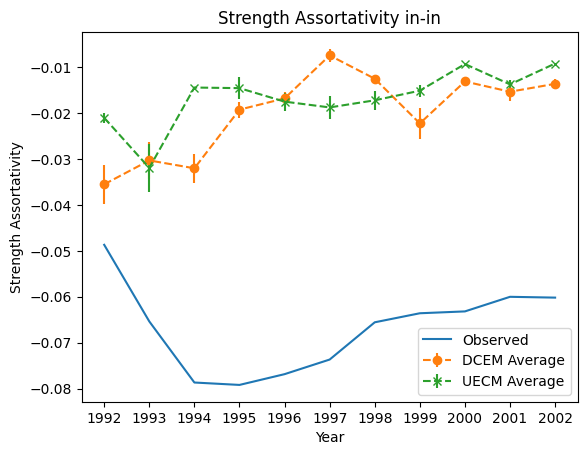

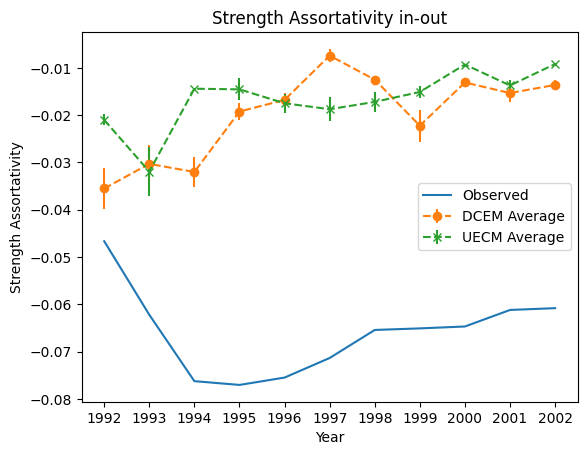

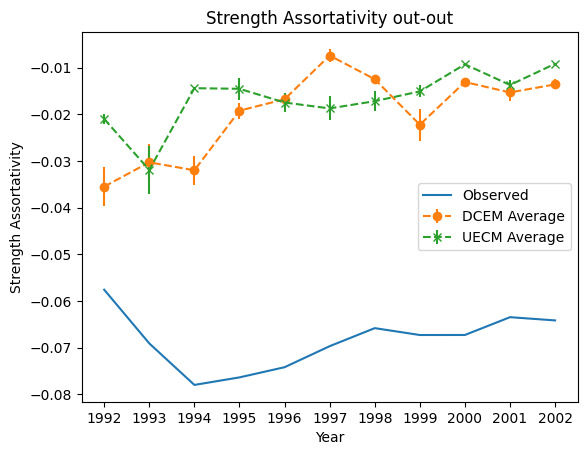

In [44]:
# Assuming you have obtained these values from your calculations
graph_names = list(graphs.keys())  # Replace with your actual years
real_values = strength_assortativities  # Replace with your actual observed strength assortativities
decm_avg_std_values = decm_sample_networks_strength_assortativity_avg_std # Replace with your calculated average and standard deviation values
uecm_avg_std_values = uecm_sample_networks_strength_assortativity_avg_std # Replace with your calculated average and standard deviation values


# Function to plot strength assortativity with error bars
def plot_strength_assortativity(assortativity_type):
    key = f"{assortativity_type[0]}-{assortativity_type[1]}"

    real_data = np.array([real_values[graph_name][key] for graph_name in graph_names])
    decm_avg_data = np.array([decm_avg_std_values[graph_name][key]['average'] for graph_name in graph_names])
    decm_std_data = np.array([decm_avg_std_values[graph_name][key]['standard deviation'] for graph_name in graph_names])
    uecm_avg_data = np.array([uecm_avg_std_values[graph_name]['undirected']['average'] for graph_name in graph_names])
    uecm_std_data = np.array([uecm_avg_std_values[graph_name]['undirected']['standard deviation'] for graph_name in graph_names])

    years = [re.search(r'\d+', graph_name).group() for graph_name in graph_names]

    plt.plot(years, real_data, label='Observed', linestyle='-')
    plt.errorbar(years, decm_avg_data, yerr=decm_std_data, label='DCEM Average', marker='o', linestyle='--')
    plt.errorbar(years, uecm_avg_data, yerr=uecm_std_data, label='UECM Average', marker='x', linestyle='--')
    
    plt.xlabel('Year')
    plt.ylabel('Strength Assortativity')
    plt.title(f'Strength Assortativity {assortativity_type[0]}-{assortativity_type[1]}')
    plt.legend()
    plt.show()

for assortativity_type in [("in", "in"), ("in", "out"), ("out", "out")]:
    plot_strength_assortativity(assortativity_type)
